## Problem Statement
#### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

In [2]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing essential libraries for data manipulation, visualization, and machine learning

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive plots
%matplotlib inline  

import seaborn as sns  # For statistical data visualization based on Matplotlib
from sklearn import linear_model  # For linear regression models
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.pipeline import Pipeline  # To create machine learning pipelines
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.pipeline import FeatureUnion  # For combining multiple transformations
from sklearn.base import BaseEstimator, TransformerMixin  # For creating custom transformers in pipelines
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import classification_report  # To evaluate classification models
from sklearn.metrics import roc_auc_score  # For calculating the ROC AUC score
from sklearn.model_selection import StratifiedKFold  # For stratified k-fold cross-validation
from sklearn.model_selection import cross_val_score  # For performing cross-validation
from sklearn.metrics import confusion_matrix  # To compute confusion matrix
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search
from sklearn.ensemble import RandomForestClassifier  # For random forest classification

from sklearn.svm import SVC  # For support vector classification
from imblearn.metrics import sensitivity_specificity_support
# Set display options for pandas DataFrame to show more columns and rows
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)


In [4]:
# Importing all datasets

churn_case_data = pd.read_csv("telecom_churn_data.csv")
churn_case_data.head()



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# feature type summary
churn_case_data.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Insights:
- There are 99999 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [7]:
# looking at data statistics
churn_case_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [8]:
# creating backup of data
Old_case_study = churn_case_data.copy()

In [9]:
# Categorizing columns by types
id_columns = ['mobile_number', 'circle_id']

date_columns = [
    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
    'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 
    'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 
    'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'
]

cat_columns = [
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
]

# Dynamically computing numeric columns
num_columns = [col for col in churn_case_data.columns if col not in id_columns + date_columns + cat_columns]

# Printing the count of columns in each category
print(f"#ID columns: {len(id_columns)}")
print(f"#Date columns: {len(date_columns)}")
print(f"#Numeric columns: {len(num_columns)}")
print(f"#Category columns: {len(cat_columns)}")

# Checking if all columns are categorized
all_columns_covered = len(id_columns) + len(date_columns) + len(num_columns) + len(cat_columns) == churn_case_data.shape[1]
print(f"All columns categorized: {all_columns_covered}")

# Identifying uncategorized columns (if any)
if not all_columns_covered:
    categorized_columns = set(id_columns + date_columns + cat_columns + num_columns)
    missing_columns = set(churn_case_data.columns) - categorized_columns
    print("Columns not categorized:", missing_columns)


#ID columns: 2
#Date columns: 12
#Numeric columns: 204
#Category columns: 8
All columns categorized: True


#### Null Values

In [11]:
# looking for missing values
(churn_case_data.isnull().sum()*100/churn_case_data.shape[0]).sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

#### Insights:
- The dataset contains missing values in several columns, with the percentage of missing values varying across columns, ranging from 0% to approximately 74.85%.
- There are approx 74-75% null values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.

#### Imputing missing values


Imputing missing values with zeroes

In [15]:
# Columns related to recharge data
recharge_columns = [
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
    'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
]

# This accounts for missing values, showing the count of non-missing rows per column
recharge_stats = churn_case_data[recharge_columns].describe(include='all')
print(recharge_stats)



       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%       

#### Insights:
- Recharge activity varies widely, with some users having no activity (min=0) and others showing high-value outliers in `max_rech_data` and `av_rech_amt_data`.

In [17]:
# The following observation validates the relationship between missing recharge values and dates:
# If both `total_rech_data_6` and `date_of_last_rech_data_6` are missing, 
 

churn_case_data.loc[churn_case_data.total_rech_data_6.isnull() & churn_case_data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


#### Insights:
- It indicates that the customer did not recharge during the respective period.

In [19]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# checking how many av_rech_amt_data_6 is NA
is_invalid_data_6 = churn_case_data['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = churn_case_data['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = churn_case_data['av_rech_amt_data_7'] == np.nan

# checking if any value is present for these rows for total_rech_data
print(churn_case_data.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(churn_case_data.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(churn_case_data.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# checking how many total_rech_data_6 is NA
is_invalid_data_6 = churn_case_data['total_rech_data_6'] == np.nan 
is_invalid_data_7 = churn_case_data['total_rech_data_7'] == np.nan 
is_invalid_data_8 = churn_case_data['total_rech_data_8'] == np.nan 

# checking if any value is present for these rows for av_rech_amt_data_6
print(churn_case_data.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(churn_case_data.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(churn_case_data.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [20]:
# List of recharge-related columns where missing values represent no recharge activity.
# For these columns, missing values will be imputed with zero.
zero_impute_recharge_cols = [
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
]

# Imputing missing values in the specified columns with 0, representing no recharge activity.
churn_case_data[zero_impute_recharge_cols] = churn_case_data[zero_impute_recharge_cols].apply(lambda x: x.fillna(0))


In [21]:
# Calculating and display the missing value ratio for the selected columns
print("Missing value ratio:\n")
missing_rat = churn_case_data[zero_impute_recharge_cols].isnull().sum() * 100 / churn_case_data.shape[0]  # Calculating the percentage of missing values
print(missing_rat)

# Displaying summary statistics for the selected columns
print("\n\nSummary statistics:\n")
print(churn_case_data[zero_impute_recharge_cols].describe(include='all'))  # Includes categorical columns in the summary


Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics:

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech

In [22]:
# showing unique values in each column
churn_case_data.nunique().sort_values(ascending=False)

mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
total_og_mou_7              40477
total_og_mou_6              40327
total_og_mou_8              40074
total_og_mou_9              39160
total_ic_mou_6              32247
total_ic_mou_7              32242
total_ic_mou_8              32128
total_ic_mou_9              31260
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
loc_ic_mou_6                28569
loc_ic_mou_7                28390
loc_ic_mou_8                28200
std_og_mou_7                27951
loc_ic_mou_9                27697
std_og_mou_6                27502
std_og_mou_8                27491
std_og_mou_9                26553
loc_og_mou_6                26372
loc_og_mou_7                26091
loc_og_mou_8                25990
loc_og_mou_9                25376
onnet_mou_7   

In [23]:
# Dropping ID and date-related columns from the dataset
print("Shape before dropping: ", churn_case_data.shape)  # Print the initial shape of the dataset

# Dropping the columns specified in id_columns and date_columns
churn_case_data = churn_case_data.drop(id_columns + date_columns, axis=1)

# Printing the new shape of the dataset to confirm the columns have been removed
print("Shape after dropping: ", churn_case_data.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


#### Replacing NaN values in categorical variables

In [25]:
# replacing missing values with '-1' in categorical columns
churn_case_data[cat_columns] = churn_case_data[cat_columns].apply(lambda x: x.fillna(-1))

In [26]:
# Calculating and display the missing value ratio for categorical columns
print("Missing value ratio:\n")

# Calculating the percentage of missing values for each column in 'cat_cols'
# 'cat_columns' should contain a list of categorical column names
missing_rat = churn_case_data[cat_columns].isnull().sum() * 100 / churn_case_data.shape[0]

# Display the Calculatingd missing value ratio
print(missing_rat)

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


####  Dropping variables with more than a given threshold of missing values

In [28]:
# Recording the initial number of columns in the dataset
initial_columns = churn_case_data.shape[1]

# Columns with a missing value ratio >= 70% will be excluded
Missing_Thresold = 0.7

# Determining which columns to include based on the missing value threshold
include_columns = list(churn_case_data.apply(lambda column: True if column.isnull().sum()/churn_case_data.shape[0] < Missing_Thresold else False))

# Creating a DataFrame to track which columns are included or excluded based on the threshold
drop_missing = pd.DataFrame({'features':churn_case_data.columns , 'include': include_columns})

# Displaying only the rows where 'include' is True (columns with missing ratio < threshold)
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [29]:
# Retaining only the columns that meet the inclusion criteria
# 'include_columns' should be a Boolean array or Series where True indicates the column is retained.
churn_case_data = churn_case_data.loc[:, include_columns]

# Calculating the number of columns dropped
# This is determined by subtracting the new column count (after filtering) from the initial column count
dropped_columns = initial_columns - churn_case_data.shape[1]

# Printing the number of columns dropped
# This provides feedback on how many columns were removed based on the missing value threshold.
print("{0} columns dropped.".format(dropped_columns))

16 columns dropped.


In [30]:
#checking the shape
churn_case_data.shape

(99999, 196)

In [31]:
# imputing the respective null columns as 0. 
churn_case_data[churn_case_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = churn_case_data[churn_case_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [32]:
# Filtering high-value customers
# Observing recharge columns
recharge_columns=churn_case_data.columns[churn_case_data.columns.str.contains('rech_amt|rech_data')]
recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [33]:
# Converting the columns specified in 'recharge_columns' to numeric values, 
# replacing any non-convertible values with NaN (Not a Number)
churn_case_data[recharge_columns] = churn_case_data[recharge_columns].apply(pd.to_numeric, errors='coerce')

# Generating summary statistics for the columns in 'recharge_columns' 
# to understand their distribution (mean, std, min, max, etc.)
churn_case_data.loc[:, recharge_columns].describe()
# null values in recharge columns
100*churn_case_data.loc[:,recharge_columns].isnull().sum()/len(churn_case_data)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [34]:
# Displaying the first 10 rows of the columns specified in 'recharge_columns' from 'churn_case_data'
churn_case_data.loc[:, recharge_columns].head(10)


,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,168.0,315.0,116.0,358.0,86.0,200.0,86.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196.0,350.0,287.0,200.0,56.0,110.0,110.0,50.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,120.0,0.0,130.0,130.0,120.0,0.0,130.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,499.0,222.0,294.0,141.0,90.0,37.0,50.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,437.0,601.0,120.0,186.0,90.0,154.0,30.0,36.0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0
9,220.0,195.0,210.0,180.0,110.0,154.0,50.0,130.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0


In [35]:
# Investigating of values for june month only
recharge_columns_6 = churn_case_data.columns[churn_case_data.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
churn_case_data.loc[:,recharge_columns_6].head(10)

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,362.0,252.0,1.0,252.0,252.0
1,74.0,44.0,0.0,0.0,0.0
2,168.0,86.0,0.0,0.0,0.0
3,230.0,60.0,0.0,0.0,0.0
4,196.0,56.0,1.0,56.0,56.0
5,120.0,120.0,0.0,0.0,0.0
6,499.0,90.0,0.0,0.0,0.0
7,1580.0,1580.0,0.0,0.0,0.0
8,437.0,90.0,0.0,0.0,0.0
9,220.0,110.0,0.0,0.0,0.0


In [36]:
# Converting columns in 'recharge_columns_6' to numeric values, 
# replacing any non-convertible values with NaN
churn_case_data[recharge_columns_6] = churn_case_data[recharge_columns_6].apply(pd.to_numeric, errors='coerce')


In [37]:
print(churn_case_data.loc[:, recharge_columns_6].describe(include='number'))


       total_rech_amt_6  max_rech_amt_6  total_rech_data_6  max_rech_data_6  \
count      99999.000000    99999.000000       99999.000000     99999.000000   
mean         327.514615      104.637486           0.619726        31.792048   
std          398.019701      120.614894           1.760541        77.248778   
min            0.000000        0.000000           0.000000         0.000000   
25%          109.000000       30.000000           0.000000         0.000000   
50%          230.000000      110.000000           0.000000         0.000000   
75%          437.500000      120.000000           1.000000         8.000000   
max        35190.000000     4010.000000          61.000000      1555.000000   

       av_rech_amt_data_6  
count        99999.000000  
mean            48.445409  
std            127.743863  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              8.250000  
max           7546.000000  


In [38]:
# Verifying percentage of null values in recharge based columns
100*churn_case_data.loc[:,recharge_columns].isnull().sum()/len(churn_case_data)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [39]:
# Verifying if rows with missing values in 'total_rech_data' and 'av_rech_amt_data' columns match for each month

# Checking if the indices of missing values in 'total_rech_data_6' match those in 'av_rech_amt_data_6'
result = churn_case_data.total_rech_data_6[churn_case_data.total_rech_data_6.isna()].index != churn_case_data.av_rech_amt_data_6[churn_case_data.av_rech_amt_data_6.isna()].index
print('June :', result.any())

# Checking if the indices of missing values in 'total_rech_data_7' match those in 'av_rech_amt_data_7'
result = churn_case_data.total_rech_data_7[churn_case_data.total_rech_data_7.isna()].index != churn_case_data.av_rech_amt_data_7[churn_case_data.av_rech_amt_data_7.isna()].index
print('July :', result.any())

# Checking if the indices of missing values in 'total_rech_data_8' match those in 'av_rech_amt_data_8'
result =churn_case_data.total_rech_data_8[churn_case_data.total_rech_data_8.isna()].index != churn_case_data.av_rech_amt_data_8[churn_case_data.av_rech_amt_data_8.isna()].index
print('Aug :', result.any())

June : False
July : False
Aug : False


#### Insights:
- With the above test now we know that if total_rech_data is null then av_rech_amt_data is also null.

#### Filtering high-value customers

In [42]:
# Creating derived variables for total data recharge for June and July
total_data_rech_6 = churn_case_data.total_rech_data_6 * churn_case_data.av_rech_amt_data_6
total_data_rech_7 = churn_case_data.total_rech_data_7 * churn_case_data.av_rech_amt_data_7

# Concatenating the new columns to the dataframe at once to avoid fragmentation
churn_case_data = pd.concat([churn_case_data, total_data_rech_6.rename('total_data_rech_6'), total_data_rech_7.rename('total_data_rech_7')], axis=1)

# Verifying the new columns
print(churn_case_data[['total_data_rech_6', 'total_data_rech_7']].head())


   total_data_rech_6  total_data_rech_7
0              252.0              252.0
1                0.0              154.0
2                0.0                0.0
3                0.0                0.0
4               56.0                0.0


In [43]:
# Checking if there are any missing values in the 'total_rech_amt_6' column
any(churn_case_data.total_rech_amt_6.isna())

False

In [44]:
# Check if there are any missing values in the 'total_rech_amt_7' column
any(churn_case_data.total_rech_amt_7.isna())

False

In [45]:
# Calculating the total recharge amount for June (amt_data_6) and July (amt_data_7)
# Total recharge = total_rech_amt_6 + total_data_rech_6
# Calculating total recharge for June and July
amt_data_6 = churn_case_data.total_rech_amt_6 + churn_case_data.total_data_rech_6
amt_data_7 = churn_case_data.total_rech_amt_7 + churn_case_data.total_data_rech_7

# Calculating average recharge for June and July
avg_amt_data_6_7 = (amt_data_6 + amt_data_7) / 2

# Concatenating all columns at once
churn_case_data = pd.concat([churn_case_data, amt_data_6.rename('amt_data_6'), amt_data_7.rename('amt_data_7'), avg_amt_data_6_7.rename('avg_amt_data_6_7')], axis=1)

# Verifying by checking the new columns
print(churn_case_data[['amt_data_6', 'amt_data_7', 'avg_amt_data_6_7']].head())

# Calculating the average recharge amount for June and July (av_amt_data_6_7)
# Average recharge = (amt_data_6 + amt_data_7) / 2
churn_case_data['avg_amt_data_6_7'] = (churn_case_data.amt_data_6 + churn_case_data.amt_data_7) / 2

# Checking the new columns to verify the operation
print(churn_case_data[['amt_data_6', 'amt_data_7', 'avg_amt_data_6_7']].head())


   amt_data_6  amt_data_7  avg_amt_data_6_7
0       614.0       504.0             559.0
1        74.0       538.0             306.0
2       168.0       315.0             241.5
3       230.0       310.0             270.0
4       252.0       350.0             301.0
   amt_data_6  amt_data_7  avg_amt_data_6_7
0       614.0       504.0             559.0
1        74.0       538.0             306.0
2       168.0       315.0             241.5
3       230.0       310.0             270.0
4       252.0       350.0             301.0


In [46]:
# Display the first 5 rows of the 'churn_case_data' DataFrame
churn_case_data.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,avg_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,

In [47]:
# Displaying the first 5 rows of the selected columns
churn_case_data[['avg_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,avg_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [48]:
#Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
# Calculating the recharge amount at the 70th percentile for the 'avg_amt_data_6_7' column
print("Recharge amount at 70th percentile:- {0}".format(churn_case_data.avg_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile:- 478.0


In [49]:
# Extracting high-value customers where the total average recharge amount for the 'good phase' (avg_amt_data_6_7) is greater than the 70th percentile
high_valued_cust = churn_case_data.loc[churn_case_data.avg_amt_data_6_7 > churn_case_data.avg_amt_data_6_7.quantile(0.7), :]
# Reseting the index to ensure a clean DataFrame
high_valued_cust = high_valued_cust.reset_index(drop=True)
# Getting the shape of the DataFrame to see how many high-value customers were identified
high_valued_cust.shape


(29953, 201)

In [50]:
# Printing the number of rows before filtering the high-value customers
print("Number of rows before filtering the high value customers =", len(churn_case_data))

Number of rows before filtering the high value customers = 99999


In [51]:
# Dropping the variables that were used to filter high-value customers
high_valued_cust = high_valued_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'avg_amt_data_6_7'], axis=1)
# Checking the shape of the DataFrame after dropping the columns
high_valued_cust.shape


(29953, 196)

In [52]:
# Display a concise summary of the DataFrame 'high_valued_cust'
high_valued_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(196)
memory usage: 44.8 MB


#### Derive churn

In [54]:
# Calculating total incoming and outgoing minutes of usage for high-value customers
high_valued_cust['total_calls_mou_9'] = high_valued_cust.total_ic_mou_9 + high_valued_cust.total_og_mou_9

In [55]:
# Calculatinging total 2G and 3G data consumption for high-value customers
high_valued_cust['total_internet_mb_9'] =  high_valued_cust.vol_2g_mb_9 + high_valued_cust.vol_3g_mb_9

In [56]:
# Createing the 'churn' variable: 1 for churned customers, 0 for non-churned

high_valued_cust['churn'] = high_valued_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [57]:
# Verifying that the churn is tagged correctly by looking at the related columns
high_valued_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29948,0,391.63,64.21,0.00,0.00
29949,0,149.26,14.44,723.41,232.56
29950,0,547.11,1095.24,9.14,941.48
29951,0,265.84,182.16,0.05,393.34


In [58]:
# Find the columns which have names ending with '_9'
month_9_cols = high_valued_cust.columns[high_valued_cust.columns.str.endswith(pat = '_9')]

# Printing out the list of column names that end with '_9'
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'total_calls_mou_9', 'total_internet_mb_9'],
      dtype='object')

In [59]:
# Dropping the derived variables 'total_calls_mou_9' and 'total_internet_mb_9'
high_valued_cust = high_valued_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [60]:
# Changing the data type of 'churn' column to 'category'
high_valued_cust.churn = high_valued_cust.churn.astype("category")

# printing churn ratio
print("Churn Ratio:")
print(high_valued_cust.churn.value_counts()*100/high_valued_cust.shape[0])

Churn Ratio:
churn
0    91.877274
1     8.122726
Name: count, dtype: float64


#### Insights:
- The churn ratio indicates that 8.12% of high-value customers have churned, suggesting a low churn rate and highlighting the need for targeted retention strategies to maintain this segment.

In [62]:
# Calculating the difference in ARPU (Average Revenue Per User) for month 8 compared to the average of months 6 and 7
high_valued_cust['arpu_diff'] = high_valued_cust.arpu_8 - ((high_valued_cust.arpu_6 + high_valued_cust.arpu_7) / 2)

# Calculating the difference in on-net MOU (Minutes of Use) for month 8 compared to the average of months 6 and 7
high_valued_cust['onnet_mou_diff'] = high_valued_cust.onnet_mou_8 - ((high_valued_cust.onnet_mou_6 + high_valued_cust.onnet_mou_7) / 2)

# Calculating the difference in off-net MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['offnet_mou_diff'] = high_valued_cust.offnet_mou_8 - ((high_valued_cust.offnet_mou_6 + high_valued_cust.offnet_mou_7) / 2)

# Calculating the difference in roam incoming MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['roam_ic_mou_diff'] = high_valued_cust.roam_ic_mou_8 - ((high_valued_cust.roam_ic_mou_6 + high_valued_cust.roam_ic_mou_7) / 2)

# Calculating the difference in roam outgoing MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['roam_og_mou_diff'] = high_valued_cust.roam_og_mou_8 - ((high_valued_cust.roam_og_mou_6 + high_valued_cust.roam_og_mou_7) / 2)

# Calculating the difference in local outgoing MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['loc_og_mou_diff'] = high_valued_cust.loc_og_mou_8 - ((high_valued_cust.loc_og_mou_6 + high_valued_cust.loc_og_mou_7) / 2)

# Calculating the difference in STD outgoing MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['std_og_mou_diff'] = high_valued_cust.std_og_mou_8 - ((high_valued_cust.std_og_mou_6 + high_valued_cust.std_og_mou_7) / 2)

# Calculating the difference in ISD outgoing MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['isd_og_mou_diff'] = high_valued_cust.isd_og_mou_8 - ((high_valued_cust.isd_og_mou_6 + high_valued_cust.isd_og_mou_7) / 2)

# Calculating the difference in special outgoing MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['spl_og_mou_diff'] = high_valued_cust.spl_og_mou_8 - ((high_valued_cust.spl_og_mou_6 + high_valued_cust.spl_og_mou_7) / 2)

# Calculating the difference in total outgoing MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['total_og_mou_diff'] = high_valued_cust.total_og_mou_8 - ((high_valued_cust.total_og_mou_6 + high_valued_cust.total_og_mou_7) / 2)

# Calculating the difference in local incoming MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['loc_ic_mou_diff'] = high_valued_cust.loc_ic_mou_8 - ((high_valued_cust.loc_ic_mou_6 + high_valued_cust.loc_ic_mou_7) / 2)

# Calculating the difference in STD incoming MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['std_ic_mou_diff'] = high_valued_cust.std_ic_mou_8 - ((high_valued_cust.std_ic_mou_6 + high_valued_cust.std_ic_mou_7) / 2)

# Calculating the difference in ISD incoming MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['isd_ic_mou_diff'] = high_valued_cust.isd_ic_mou_8 - ((high_valued_cust.isd_ic_mou_6 + high_valued_cust.isd_ic_mou_7) / 2)

# Calculating the difference in special incoming MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['spl_ic_mou_diff'] = high_valued_cust.spl_ic_mou_8 - ((high_valued_cust.spl_ic_mou_6 + high_valued_cust.spl_ic_mou_7) / 2)

# Calculating the difference in total incoming MOU for month 8 compared to the average of months 6 and 7
high_valued_cust['total_ic_mou_diff'] = high_valued_cust.total_ic_mou_8 - ((high_valued_cust.total_ic_mou_6 + high_valued_cust.total_ic_mou_7) / 2)

# Calculating the difference in total recharge number for month 8 compared to the average of months 6 and 7
high_valued_cust['total_rech_num_diff'] = high_valued_cust.total_rech_num_8 - ((high_valued_cust.total_rech_num_6 + high_valued_cust.total_rech_num_7) / 2)

# Calculating the difference in total recharge amount for month 8 compared to the average of months 6 and 7
high_valued_cust['total_rech_amt_diff'] = high_valued_cust.total_rech_amt_8 - ((high_valued_cust.total_rech_amt_6 + high_valued_cust.total_rech_amt_7) / 2)

# Calculating the difference in maximum recharge amount for month 8 compared to the average of months 6 and 7
high_valued_cust['max_rech_amt_diff'] = high_valued_cust.max_rech_amt_8 - ((high_valued_cust.max_rech_amt_6 + high_valued_cust.max_rech_amt_7) / 2)

# Calculating the difference in total recharge data for month 8 compared to the average of months 6 and 7
high_valued_cust['total_rech_data_diff'] = high_valued_cust.total_rech_data_8 - ((high_valued_cust.total_rech_data_6 + high_valued_cust.total_rech_data_7) / 2)

# Calculating the difference in maximum recharge data for month 8 compared to the average of months 6 and 7
high_valued_cust['max_rech_data_diff'] = high_valued_cust.max_rech_data_8 - ((high_valued_cust.max_rech_data_6 + high_valued_cust.max_rech_data_7) / 2)

# Calculating the difference in average recharge amount per data for month 8 compared to the average of months 6 and 7
high_valued_cust['av_rech_amt_data_diff'] = high_valued_cust.av_rech_amt_data_8 - ((high_valued_cust.av_rech_amt_data_6 + high_valued_cust.av_rech_amt_data_7) / 2)

# Calculating the difference in volume of 2G data for month 8 compared to the average of months 6 and 7
high_valued_cust['vol_2g_mb_diff'] = high_valued_cust.vol_2g_mb_8 - ((high_valued_cust.vol_2g_mb_6 + high_valued_cust.vol_2g_mb_7) / 2)

# Calculating the difference in volume of 3G data for month 8 compared to the average of months 6 and 7
high_valued_cust['vol_3g_mb_diff'] = high_valued_cust.vol_3g_mb_8 - ((high_valued_cust.vol_3g_mb_6 + high_valued_cust.vol_3g_mb_7) / 2)


In [63]:
# Displaying statistical summary for the 'total_og_mou_diff' column
high_valued_cust['total_og_mou_diff'].describe()

count    29953.000000
mean       -67.461292
std        502.520398
min      -7213.410000
25%       -167.865000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [64]:
# Extracting columns that represent data for the 9th month (churned month)
columns_9 =  high_valued_cust.columns[high_valued_cust.columns.str.contains('_9')]

In [65]:
# Filtering and get column names that end with '9'
columns_9 = high_valued_cust.filter(regex='9$', axis=1).columns

In [66]:
# Removing columns that end with '_9' from the existing cat_columns
cat_columns = [col for col in cat_columns if col not in columns_9]

# Appending the 'churn' column to the cat_columns list
cat_columns.append('churn')

# Updating num_columns list: include columns that are not in cat_columns
num_columns = [col for col in high_valued_cust.columns if col not in cat_columns]

In [67]:
# Converting numeric columns to numeric types (float64 or int64)
# This ensures that the columns in 'num_columns' are properly formatted as numeric types for any mathematical or statistical operations
high_valued_cust[num_columns] = high_valued_cust[num_columns].apply(pd.to_numeric, errors='coerce')

# Converting categorical columns to category type
# This conversion helps reduce memory usage and improves performance when working with categorical data
# Using a loop to handle each column
for col in cat_columns:
    high_valued_cust[col] = high_valued_cust[col].astype("category")


### EDA

In [69]:
# Function to determine if a variable is numerical or categorical
def data_type(variable):
    # Check if the variable is of numerical type (int64 or float64)
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    # Check if the variable is categorical
    elif variable.dtype == 'category':
        return 'categorical'
    else:
        return 'unknown'  # Handle cases where the variable type is not recognized

# Function to perform univariate analysis: plot and print statistics
def univariate(variable, stats=True):
    # Check if the variable is numerical
    if data_type(variable) == 'numerical':
        # Plot a histogram with a KDE (Kernel Density Estimation) curve for numerical data
        sns.histplot(variable, kde=True)  # Using histplot instead of deprecated distplot
        # Print summary statistics if requested
        if stats:
            print(variable.describe())
    
    # Check if the variable is categorical
    elif data_type(variable) == 'categorical':
        # Plot a countplot for categorical data
        sns.countplot(x=variable)
        # Print the count of each category if requested
        if stats:
            print(variable.value_counts())
    
    else:
        # Print an error message if the variable is neither numerical nor categorical
        print("Invalid variable passed: please pass a numeric or categorical variable.")

# Function to perform bivariate analysis: plot relationships between two variables
def bivariate(var1, var2):
    # Check if both variables are numerical
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        # Plot a regression plot to visualize the relationship between two numerical variables
        sns.regplot(x=var1, y=var2)
    
    # Check if one variable is categorical and the other is numerical
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        # Plot a boxplot to compare the numerical variable across categories
        sns.boxplot(x=var1, y=var2)
    
    else:
        # Print an error message if the variables do not meet the requirements
        print("Both variables should either be numerical or one categorical and the other numerical.")
#  plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

#### Univariate EDA

float64
count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


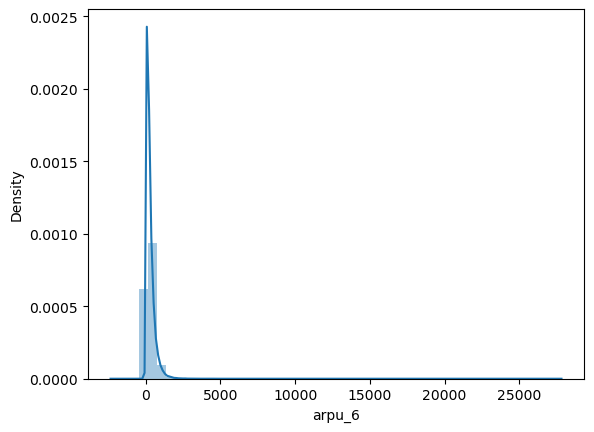

In [71]:
# Checking the data type of 'churn.arpu_6' before plotting
print(churn_case_data['arpu_6'].dtype)  # This will display the data type of the 'arpu_6' column

# Calling the univariate function to visualize the distribution of 'arpu_6'
univariate(churn_case_data['arpu_6'])    

float64
count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


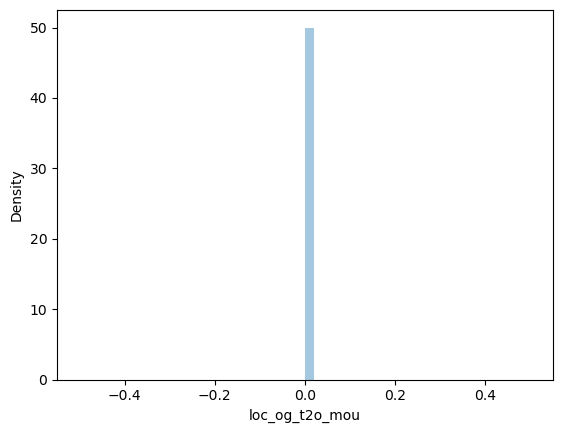

In [72]:
# Checking the data type of 'loc_og_t2o_mou' before plottingunivariate(churn_case_data['loc_og_t2o_mou'])    
print(churn_case_data['loc_og_t2o_mou'].dtype)  # This will display the data type of the 'loc_og_t2o_mou' column


univariate(churn_case_data.loc_og_t2o_mou)

float64
count    99999.000000
mean       125.864313
std        302.023240
min          0.000000
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


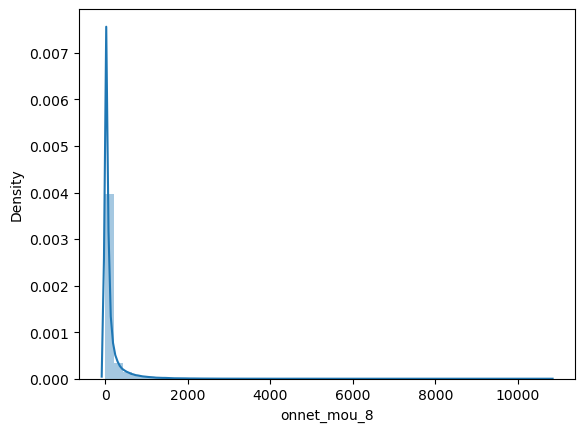

In [73]:
# Checking the data type of 'onnet_mou_8' before plotting
print(churn_case_data['onnet_mou_8'].dtype)  # This will display the data type of the 'onnet_mou_8' column

# Plotting the univariate distribution for the 'onnet_mou_8' column
univariate(churn_case_data['onnet_mou_8'])


float64
count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


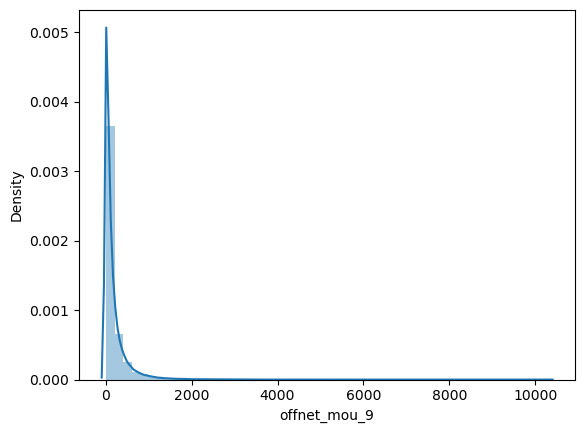

In [74]:
# Checking the data type of 'offnet_mou_9' before plotting
print(churn_case_data['offnet_mou_9'].dtype)  # This will display the data type of the 'offnet_mou_9' column

# Plotting the univariate distribution for the 'offnet_mou_9' column
univariate(churn_case_data['offnet_mou_9'])


#### Bivariate EDA

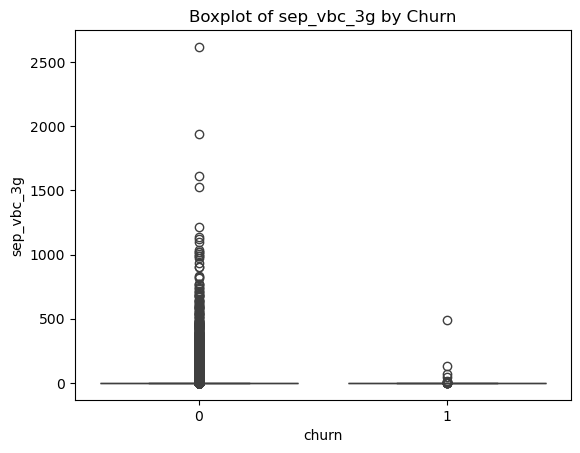

In [76]:
# Creating a boxplot showing the distribution of 'sep_vbc_3g' based on the 'churn' status
sns.boxplot(x='churn', y='sep_vbc_3g', data=high_valued_cust)

# Adding a title to the plot
plt.title('Boxplot of sep_vbc_3g by Churn')

# Displaying the plot
plt.show()


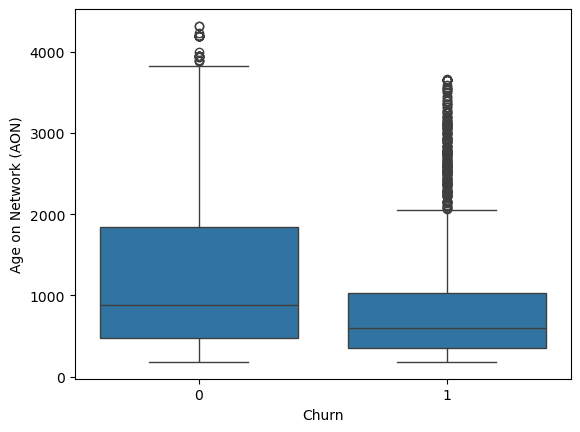

In [77]:
# Creating a boxplot to show the distribution of 'AON' based on churn status
sns.boxplot(x=high_valued_cust['churn'], y=high_valued_cust['aon'])

# Setting the label for the x-axis
plt.xlabel('Churn')

# Setting the label for the y-axis
plt.ylabel('Age on Network (AON)')

# Displaying the plot
plt.show()


#### Insights:
- newer customers are more likely to churn.

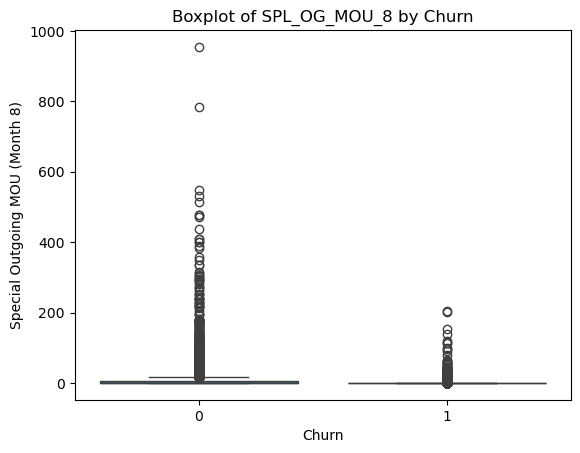

         count      mean        std  min  25%  50%   75%     max
churn                                                           
0      27520.0  6.889673  20.874102  0.0  0.0  0.7  6.63  954.51
1       2433.0  2.695898  11.117952  0.0  0.0  0.0  0.00  204.88


In [79]:
# Creating a boxplot to show the distribution of 'spl_og_mou_8' based on churn status
sns.boxplot(x=high_valued_cust['churn'], y=high_valued_cust['spl_og_mou_8'])

# Setting the title for the plot
plt.title('Boxplot of SPL_OG_MOU_8 by Churn')

# Labeling the x-axis as 'Churn'
plt.xlabel('Churn')

# Labeling the y-axis as 'Special Outgoing MOU (Month 8)'
plt.ylabel('Special Outgoing MOU (Month 8)')

# Displaying the plot
plt.show()

# Grouping the data by 'churn' and calculating descriptive statistics for 'spl_og_mou_8'
grouped_stats = high_valued_cust.groupby('churn')['spl_og_mou_8'].describe()

# Printing the grouped statistics
print(grouped_stats)



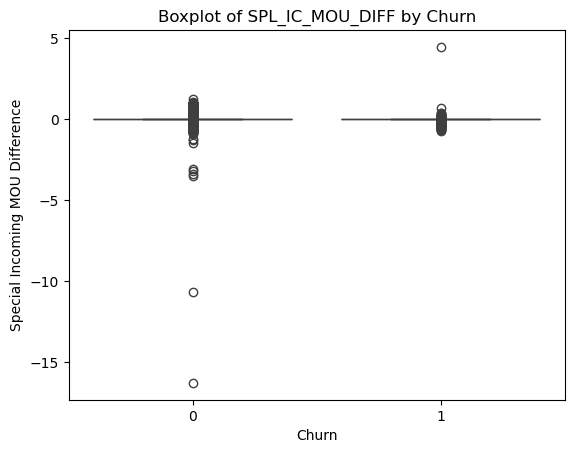

         count      mean       std    min  25%  50%  75%   max
churn                                                         
0      27520.0 -0.012140  0.177863 -16.28  0.0  0.0  0.0  1.26
1       2433.0 -0.033309  0.129403  -0.74  0.0  0.0  0.0  4.45


In [80]:
sns.boxplot(x=high_valued_cust['churn'], y=high_valued_cust['spl_ic_mou_diff'])
plt.title('Boxplot of SPL_IC_MOU_DIFF by Churn')
plt.xlabel('Churn')
plt.ylabel('Special Incoming MOU Difference')
plt.show()
grouped_stats = high_valued_cust.groupby('churn')['spl_ic_mou_diff'].describe()
print(grouped_stats)


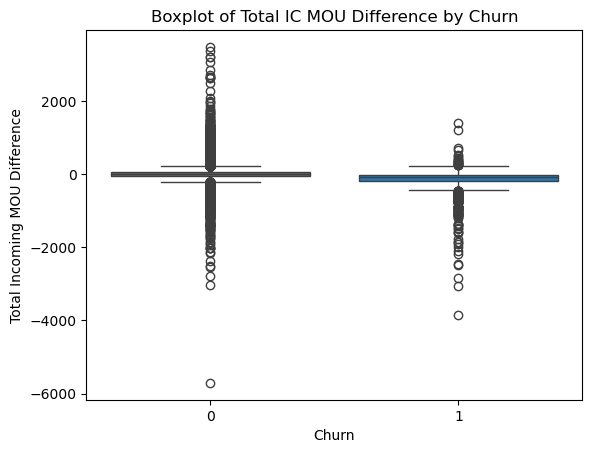

         count        mean         std       min      25%     50%       75%  \
churn                                                                         
0      27520.0   -1.925593  213.669652 -5710.150  -57.495  -2.095  50.90625   
1       2433.0 -143.912224  267.948225 -3841.055 -186.665 -76.635 -15.23500   

           max  
churn           
0      3485.37  
1      1404.83  


In [81]:
# Creating a boxplot to show the distribution of 'total_ic_mou_diff' based on churn status
sns.boxplot(x=high_valued_cust['churn'], y=high_valued_cust['total_ic_mou_diff'])

# Setting the title for the plot
plt.title('Boxplot of Total IC MOU Difference by Churn')

# Labeling the x-axis as 'Churn'
plt.xlabel('Churn')

# Labeling the y-axis as 'Total Incoming MOU Difference'
plt.ylabel('Total Incoming MOU Difference')

# Displaying the plot
plt.show()

# Grouping the data by 'churn' and calculating descriptive statistics for 'total_ic_mou_diff'
grouped_stats = high_valued_cust.groupby('churn')['total_ic_mou_diff'].describe()

# Printing the grouped statistics
print(grouped_stats)



In [82]:
# Printing a header to indicate we're displaying summary metrics for numeric variables
print('Summary metrics - Numeric Variables')

# Defining the number of columns to process; you can adjust this based on the actual number of columns in your DataFrame
num_columns = 160  # Adjust this number based on the actual number of columns in your DataFrame

# Looping through the DataFrame in chunks of 20 columns at a time for efficient processing
for start in range(0, num_columns, 20):
    # Defining the end index for the current chunk of columns (20 columns per chunk)
    end = start + 20  
    
    # Selecting the subset of numeric data for the current range of columns
    numeric_data = high_valued_cust.iloc[:, start:end]._get_numeric_data()
    
    # Printing the column range being summarized (to keep track of the progress)
    print(f"\nSummary for columns {start} to {end-1}:")
    
    # Generating and printing the summary statistics (mean, std, min, max, etc.) for the selected numeric columns
    print(numeric_data.describe()) 



Summary metrics - Numeric Variables

Summary for columns 0 to 19:
       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29953.0         29953.0         29953.0  29953.000000   
mean              0.0             0.0             0.0    558.820058   
std               0.0             0.0             0.0    460.868223   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    310.142000   
50%               0.0             0.0             0.0    482.354000   
75%               0.0             0.0             0.0    700.240000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     561.160547    508.890301    467.446183    260.900880    268.051744   
std      480.028497    502.136278    501.837624    459.85

#### Insights:
- Some revenue columns have negative values, indicating invalid data, and can be dropped, while call usage minutes mostly have zeros with a few outliers.
- Numeric columns should be rounded to two decimal places, and integers and dates need proper type conversion.
- Most call and data usage columns have medians at zero with significant outliers, suggesting the need for aggregation or binning.
- The dataset has a 6% churn class imbalance, requiring techniques like resampling to handle it effectively.
- Deriving features like years on the network, customer type, and usage patterns can improve customer segmentation and churn prediction.

In [84]:
def analyze_features(feature_start):
    
    # Set the size of the plot for better visualization
    # This ensures the plots are large enough for easy viewing
    plt.rcParams["figure.figsize"] = [17, 7]
    
    # Defining column names for the 6th, 7th, and 8th months based on the given feature start
    # The feature names are dynamically created by appending 6, 7, and 8 to the feature_start string
    cols = {c: f"{feature_start}_{c}" for c in [6, 7, 8]}
    print("Analyzing columns:", cols)  # Print the columns being analyzed for tracking
    
    # Initialize an empty list to store the summary statistics for each churn group
    frame_data = []
    
    # Loop through both churn groups: 0 (Non-Churned) and 1 (Churned)
    for churn in [0, 1]:
        # For each churn group, calculate the mean and standard deviation for columns 6, 7, and 8
        frame_data.append({
            # Mean values for 6th, 7th, and 8th months
            "mean_6": high_valued_cust[high_valued_cust["churn"] == churn][cols[6]].mean(),
            "mean_7": high_valued_cust[high_valued_cust["churn"] == churn][cols[7]].mean(),
            "mean_8": high_valued_cust[high_valued_cust["churn"] == churn][cols[8]].mean(),
            # Standard deviation values for 6th, 7th, and 8th months
            "std_6": high_valued_cust[high_valued_cust["churn"] == churn][cols[6]].std(),
            "std_7": high_valued_cust[high_valued_cust["churn"] == churn][cols[7]].std(),
            "std_8": high_valued_cust[high_valued_cust["churn"] == churn][cols[8]].std()
        })
    
    # Create a figure with three subplots (one for each month: 6, 7, and 8)
    f, axes = plt.subplots(nrows=1, ncols=3)  # 1 row, 3 columns
    
    # Plotting the boxplots for the feature across the 6th, 7th, and 8th months
    # For each month, we are plotting the churn status on the x-axis, the feature values on the y-axis
    # and using a different hue for churn status (0 for non-churned, 1 for churned)
    sns.boxplot(data=high_valued_cust, y=cols[6], x="churn", hue="churn",
                linewidth=2.5, showfliers=False, ax=axes[0])  # 6th month boxplot
    sns.boxplot(data=high_valued_cust, y=cols[7], x="churn", hue="churn",
                linewidth=2.5, showfliers=False, ax=axes[1])  # 7th month boxplot
    sns.boxplot(data=high_valued_cust, y=cols[8], x="churn", hue="churn",
                linewidth=2.5, showfliers=False, ax=axes[2])  # 8th month boxplot
    
    # Returning a DataFrame with the calculated summary statistics for each churn group (Non-Churned and Churned)
    # The statistics are rounded to 2 decimal places for easier reading
    return pd.DataFrame(frame_data, index=["Non-Churned", "Churned"]).round(2)


Analyzing columns: {6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non-Churned,649.97,663.89,613.98,547.95,574.45,615.04
Churned,787.33,627.46,253.69,682.48,668.66,452.97


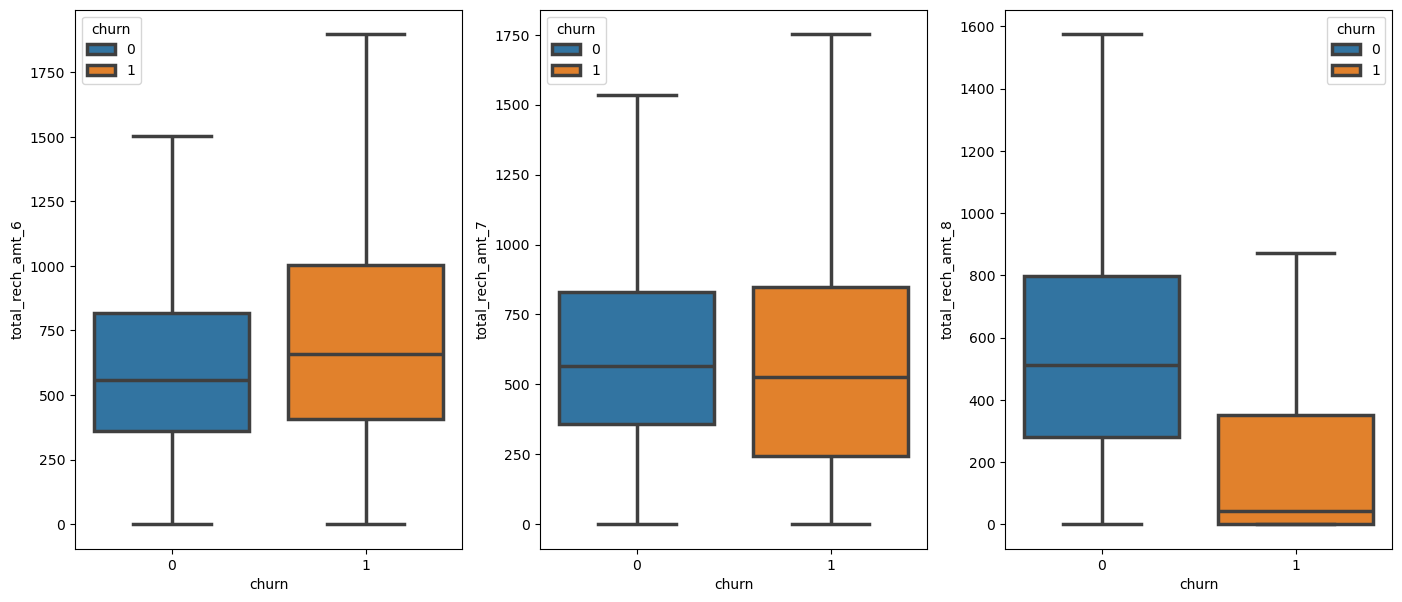

In [85]:
# Analyzing the feature 'total_rech_amt' (Total Recharge Amount)
analyze_features('total_rech_amt')

#### Insights:
- Churned customers tend to have significantly lower recharge amounts in month 8 compared to previous months, while non-churned customers show relatively consistent recharge behavior across months.
-  Churned customers exhibit higher variation in recharge amounts for months 6 and 7 but reduced variation in month 8, indicating a steep drop in engagement before churn.

In [87]:
# Selecting columns in the dataset that contain the string 'rech_amt'
recharge_amnt_columns =  high_valued_cust.columns[high_valued_cust.columns.str.contains('rech_amt')]
# Displaying the list of columns that match the condition
recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'av_rech_amt_data_diff'],
      dtype='object')

# Analyze the feature 'max_rech_amt' (Maximum Recharge Amount)
analyze_features('max_rech_amt')

In [89]:
# Creating a cross-tabulation of 'churn' vs. 'night_pck_user_8' with percentage normalization by columns
pd.crosstab(high_valued_cust.churn, high_valued_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.918105,97.114275,97.360704
1,14.081895,2.885725,2.639296


In [90]:
# Creating a cross-tabulation of 'churn' vs. 'sachet_3g_8' (3G Sachet Usage in 8th month)
pd.crosstab(high_valued_cust.churn, high_valued_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24936,1608,397,183,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2361,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Cappng outliers in all numeric variables with k-sigma technique

In [92]:
def cap_outliers(array, k=3):
    # Calculating the upper and lower limits based on the mean and standard deviation
    upper_limit = array.mean() + k * array.std()  # Upper limit for outlier capping
    lower_limit = array.mean() - k * array.std()  # Lower limit for outlier capping
    
    # Capping values below the lower limit
    array[array < lower_limit] = lower_limit
    
    # Capping values above the upper limit
    array[array > upper_limit] = upper_limit
    
    # Returning the modified array with capped outliers
    return array


In [93]:
# creating a sample array with 100 elements ranging from 0 to 99
sample_array = list(range(100))

# Adding outliers to the data
sample_array[0] = -9999  # Outlier at the start
sample_array[99] = 9999  # Outlier at the end

# Converting the list to a numpy array for processing
sample_array = np.array(sample_array)

# Capping outliers using the cap_outliers function with k=2 (capturing outliers within 2 standard deviations)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [94]:
# Ensuring num_columns is a list of numeric columns (which it already is as an Index)
num_columns = high_valued_cust.select_dtypes(include=['int', 'float']).columns

# Applying the cap_outliers function to the numeric columns
high_valued_cust[num_columns] = high_valued_cust[num_columns].apply(cap_outliers, axis=0)


In [95]:
# Generating descriptive statistics with custom percentiles
high_valued_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29

### Modelling

#### Making predictions


Preprocessing data

In [99]:
#building the model
# Converting 'churn' column to numeric type
high_valued_cust['churn'] = pd.to_numeric(high_valued_cust['churn'])

In [100]:
# Separate features (X) and target variable (y)
X = high_valued_cust.drop("churn", axis = 1)  # Drop the 'churn' column from the DataFrame to get the features
y = high_valued_cust.churn  # Assign the 'churn' column as the target variable

# Splitting the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Target variable
    test_size = 0.25,  # 25% of the data will be used for testing
    random_state = 4,  # Ensures reproducibility of the split
    stratify = y 
)

#### Aggregating the categorical columns

In [102]:
# Combine features and target variable into a single DataFrame for easier analysis
train = pd.concat([X_train, y_train], axis=1)  # Concatenate X_train and y_train along the columns axis

# Aggregate the categorical variables by calculating the mean churn rate for each category
# For 'night_pck_user' variable across different months (6, 7, and 8)
train.groupby('night_pck_user_6', observed=True).churn.mean()  # Group by 'night_pck_user_6' and calculate mean churn rate
train.groupby('night_pck_user_7', observed=True).churn.mean()  # Group by 'night_pck_user_7' and calculate mean churn rate
train.groupby('night_pck_user_8', observed=True).churn.mean()  # Group by 'night_pck_user_8' and calculate mean churn rate

# For 'fb_user' variable across different months (6, 7, and 8)
train.groupby('fb_user_6', observed=True).churn.mean()  # Group by 'fb_user_6' and calculate mean churn rate
train.groupby('fb_user_7', observed=True).churn.mean()  # Group by 'fb_user_7' and calculate mean churn rate
train.groupby('fb_user_8', observed=True).churn.mean()  # Group by 'fb_user_8' and calculate mean churn rate


fb_user_8
-1.0    0.141152
 0.0    0.062857
 1.0    0.025074
Name: churn, dtype: float64

In [103]:

y_test.shape

(7489,)

In [104]:

y_train.shape

(22464,)

In [105]:
X_train.shape

(22464, 219)

In [106]:

X_test.shape

(7489, 219)

In [107]:
# Replacing categories with aggregated values using mapping
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }

# Ensuring columns are categorical before using .replace()
for col in mapping.keys():
    if X_train[col].dtype.name == 'category':
        X_train[col] = X_train[col].cat.rename_categories(mapping[col])
    else:
        X_train[col] = X_train[col].map(mapping[col])

    if X_test[col].dtype.name == 'category':
        X_test[col] = X_test[col].cat.rename_categories(mapping[col])
    else:
        X_test[col] = X_test[col].map(mapping[col])

# Checking that replacement was successful
print(X_train.head())
print(X_test.head())


       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
14197             0.0             0.0             0.0   351.728  249.335   
21791             0.0             0.0             0.0   163.078  651.271   
665               0.0             0.0             0.0   787.930  655.264   
8087              0.0             0.0             0.0   240.088  419.726   
19818             0.0             0.0             0.0  1107.167  440.911   

        arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
14197  294.392  319.173        26.84        42.49        10.54        33.76   
21791  422.240  509.580        92.53       673.86       340.73      1046.16   
665    563.920  470.927       136.36        99.76       140.23        89.39   
8087   291.114  466.380       114.01        63.29        98.14        74.63   
19818    0.000    0.000      1474.56       521.13         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_

In [108]:
# Displaying information about categorical columns in X_train (excluding the 'churn' column)
X_train[[col for col in cat_columns if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22464 entries, 14197 to 17924
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22464 non-null  category
 1   night_pck_user_7  22464 non-null  category
 2   night_pck_user_8  22464 non-null  category
 3   fb_user_6         22464 non-null  category
 4   fb_user_7         22464 non-null  category
 5   fb_user_8         22464 non-null  category
dtypes: category(6)
memory usage: 307.9 KB


#### PCA

In [110]:
# Creating a pipeline for PCA
pca = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing the data (mean=0, std=1)
    ('pca', PCA())                 # Applying PCA to reduce dimensionality
])

In [111]:
# Fitting the PCA model to the training data to learn the principal components
pca.fit(X_train)

# Transforming the training data into the principal component space
churn_pca = pca.fit_transform(X_train)  # The data is now in reduced dimensions


In [112]:
# extracting pca model from pipeline
pca = pca.named_steps['pca']

# looking at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.51
1       21.20
2       27.00
3       31.55
4       35.25
5       38.77
6       41.42
7       43.63
8       45.74
9       47.81
10      49.78
11      51.64
12      53.32
13      54.84
14      56.33
15      57.75
16      59.07
17      60.34
18      61.50
19      62.63
20      63.73
21      64.80
22      65.79
23      66.76
24      67.68
25      68.57
26      69.43
27      70.28
28      71.12
29      71.94
30      72.73
31      73.50
32      74.25
33      74.99
34      75.70
35      76.39
36      77.05
37      77.68
38      78.31
39      78.92
40      79.50
41      80.06
42      80.56
43      81.05
44      81.53
45      81.99
46      82.44
47      82.87
48      83.30
49      83.73
50      84.14
51      84.54
52      84.92
53      85.28
54      85.64
55      85.98
56      86.31
57      86.64
58      86.96
59      87.28
60      87.58
61      87.89
62      88.18
63      88.47
64      88.76
65      89.03
66      89.31
67      89.57
68      89.84
69      90.10
70      90.35
71    

#### Insights:
-  60 components explain 90% variance
- 80 components explain 95% variance

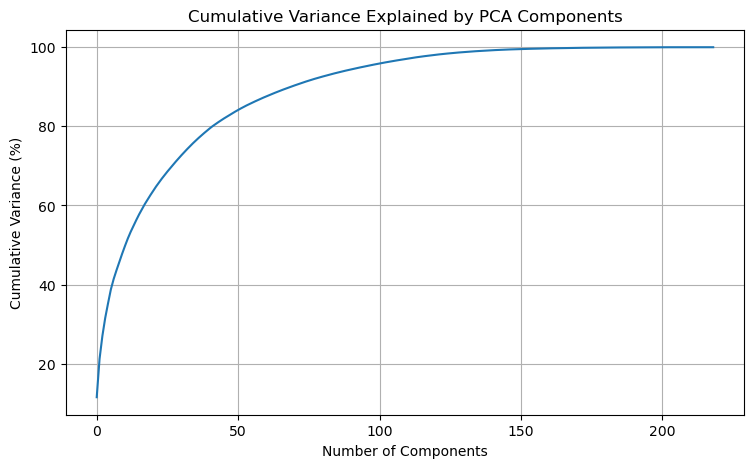

In [114]:

# Creating a range for the number of components (from 0 to the number of principal components)
features = range(pca.n_components_)

# Calculating cumulative explained variance, converting it to percentage form, and rounding to 4 decimal places
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)

# Creating a figure with a specific size for better clarity of the plot
plt.figure(figsize=(175/20,100/20))  # Adjusting figure size for optimal view

# Plotting the cumulative variance against the number of components
plt.plot(cumulative_variance)

# Adding a title to the plot to explain what it shows
plt.title('Cumulative Variance Explained by PCA Components')

# Labeling the x-axis as the number of components
plt.xlabel('Number of Components')

# Labeling the y-axis as cumulative variance percentage
plt.ylabel('Cumulative Variance (%)')

# Enabling grid lines for better visual clarity of the plot
plt.grid(True)

# Displaying the plot to visualize the variance explained by each component
plt.show()


### PCA and Logistic Regression

In [116]:
# Setting the number of principal components to retain after PCA transformation
PCA_VARS = 60

# Defining the steps in the pipeline:
# 1. 'scaler': Standardizes the data using StandardScaler
# 2. 'pca': Reduces the dimensionality of the data using PCA, keeping the top 60 components
# 3. 'logistic': Applies Logistic Regression to the transformed data, with class balancing
steps = [('scaler', StandardScaler()), 
         ("pca", PCA(n_components=PCA_VARS)), 
         ("logistic", LogisticRegression(class_weight='balanced'))]

# Creating the pipeline with the above defined steps
pipeline = Pipeline(steps)


In [117]:
# Fitting the pipeline on the training data (X_train) and its corresponding labels (y_train)
# This step applies all steps in the pipeline (scaling, PCA, and logistic regression) on the training data
pipeline.fit(X_train, y_train)

# Checking the model's accuracy on the training data by evaluating the score
# The `score()` function returns the mean accuracy of the model on the given data
pipeline.score(X_train, y_train)


0.9589565527065527

### Evaluate on test data

In [119]:
# Predicting churn (target variable) on the test data using the fitted pipeline
# The `predict()` method applies the entire pipeline (scaling, PCA, logistic regression) to the test data
y_pred = pipeline.predict(X_test)

# Creating and printing the confusion matrix to evaluate the model's performance
# The confusion matrix shows the true positive, false positive, true negative, and false negative counts
print(confusion_matrix(y_test, y_pred))



# Calculating Sensitivity and Specificity using the actual labels (y_test) and predicted labels (y_pred)
# Sensitivity (Recall) measures the proportion of true positives, while Specificity measures the proportion of true negatives
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')

# Printing Sensitivity and Specificity with 2 decimal precision
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Predicting probabilities for the positive class (churned) on the test data
# `predict_proba()` returns the probabilities for both classes (churned and non-churned), so we select the probability of the positive class
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculating and printing the Area Under the ROC Curve (AUC) to evaluate the model's performance
# The AUC ranges from 0 to 1, where a higher AUC indicates a better performing model
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob), 2))


[[6557  324]
 [   6  602]]
Sensitivity: 	0.99
Specificity: 	0.95
AUC:    	 0.99


### Hyperparameter tuning- PCA and Logistic Regression

In [121]:
# Checking the class imbalance in the training data by calculating the proportion of each class (0: Non-Churned, 1: Churned)

y_train.value_counts()/y_train.shape[0]


churn
0    0.918759
1    0.081241
Name: count, dtype: float64

In [122]:
# Logistic Regression setup with class weights to handle class imbalance
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000)

# Creating a pipeline with scaling, PCA, and logistic regression
steps = [
    ("scaler", StandardScaler()),  # Standardize features
    ("pca", pca),                  # Apply PCA for dimensionality reduction
    ("logistic", logistic)         # Apply logistic regression
]

# Compile the pipeline
pca_logistic = Pipeline(steps)

# Define the parameter grid for hyperparameter tuning
param_grid = [
    {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1'], 'logistic__solver': ['liblinear']},
    {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l2'], 'logistic__solver': ['liblinear', 'lbfgs']}
]

# Create Stratified K-Fold cross-validator
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Set up GridSearchCV for hyperparameter tuning
model = GridSearchCV(
    estimator=pca_logistic,
    cv=folds,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC
    n_jobs=-1,          # Use all cores for parallel processing
    verbose=1           # Show detailed progress
)


In [123]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                          'logistic__penalty': ['l1'],
                          'logistic__solver': ['liblinear'],
                          'pca__n_components': [60, 80]},
                         {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                          'logistic__penalty': ['l2'],
                          'logistic__solver': ['liblinear', 'lbfgs'],
                          'pca__n_components': [60, 80]}],
             scoring='roc_auc', verbose=1)

In [124]:
# Displaying cross-validation results
pd.DataFrame(model.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_logistic__solver,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.049449,0.152982,0.061135,0.005978,0.1,l1,liblinear,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.989078,0.990132,0.990859,0.990363,0.989818,0.990050,0.000593,47
1,2.851212,0.190100,0.070765,0.007319,0.1,l1,liblinear,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.989675,0.990653,0.991207,0.991024,0.990214,0.990555,0.000556,45
2,8.347845,2.447574,0.069211,0.013024,0.5,l1,liblinear,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.991403,0.991286,0.991574,0.991282,0.990660,0.991241,0.000309,39
3,9.764322,1.514741,0.078973,0.012011,0.5,l1,liblinear,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.993530,0.993763,0.993585,0.993442,0.992481,0.993360,0.000452,19
4,7.477238,0.860961,0.080889,0.014219,1,l1,liblinear,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.991252,0.991535,0.991495,0.991963,0.990559,0.991361,0.000462,31
5,17.075286,0.714726,0.068661,0.006716,1,l1,liblinear,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.994552,0.993994,0.994019,0.994967,0.993645,0.994236,0.000467,12
6,10.076540,0.744433,0.068244,0.008568,2,l1,liblinear,60,"{'logistic__C': 2, 'logistic__penalty': 'l1', ...",0.991118,0.991861,0.991667,0.990986,0.990542,0.991235,0.000476,40
7,29.420413,2.478764,0.067790,0.005804,2,l1,liblinear,80,"{'logistic__C': 2, 'logistic__penalty': 'l1', ...",0.995242,0.992510,0.994697,0.994502,0.994493,0.994289,0.000930,11
8,10.629351,1.209432,0.065963,0.006739,3,l1,liblinear,60,"{'logistic__C': 3, 'logistic__penalty': 'l1', ...",0.992144,0.991693,0.991253,0.991087,0.990361,0.991308,0.000599,35
9,38.324870,4.040902,0.062437,0.005788,3,l1,liblinear,80,"{'logistic__C': 3, 'logistic__penalty': 'l1', ...",0.994906,0.994401,0.994890,0.995132,0.994271,0.994720,0.000328,5


In [125]:
# Displaying best hyperparameters score
model.best_score_

0.9949059189710961

In [126]:

#Displaying best hyperparameters
model.best_params_

{'logistic__C': 4,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear',
 'pca__n_components': 80}

In [127]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[[6694  187]
 [   2  606]]
Sensitivity: 	1.0
Specificity: 	0.97
AUC:    	 0.996


In [128]:
# Initializing RandomForestClassifier with class weights to handle class imbalance and parallel processing
frt = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

# Defining the parameter grid for GridSearchCV: Trying different criteria for splitting nodes and number of features
param = {
    "criterion": ['gini', 'entropy'],  # Two options for measuring the quality of splits
    "max_features": [1]  # Limit the maximum number of features used for splitting at each node
}

# Creating Stratified K-Fold cross-validator with 5 splits to maintain the distribution of the target variable in each fold
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Setting up GridSearchCV for hyperparameter tuning using AUC as the scoring metric
# This will search over the specified hyperparameters and use cross-validation to evaluate each combination
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)


In [129]:

# fitting the model
model.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [130]:
# Displaying best hyperparameters score
model.best_score_

0.9992896865898301

In [131]:
# Displaying best hyperparameters
model.best_params_

{'criterion': 'entropy', 'max_features': 1}

In [132]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6865   16]
 [  52  556]]
Sensitivity: 	0.91
Specificity: 	1.0
AUC:    	 1.0


In [133]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [134]:
# fiting the model
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=15,
                       oob_score=True, random_state=20, verbose=1)

In [135]:
# checking OOB score
rand_frt_model.oob_score_

0.9996438746438746

In [136]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6881    0]
 [   0  608]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [137]:
# predictors
feature = high_valued_cust.drop('churn', axis=1).columns

In [138]:
# feature_importance
importance = rand_frt_model.feature_importances_

In [139]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [140]:
# sorting the features
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_9,8.643721e+00
1,loc_ic_t2m_mou_9,8.636399e+00
2,loc_ic_mou_9,7.839673e+00
3,loc_og_mou_9,7.476869e+00
4,loc_og_t2t_mou_9,6.486731e+00
5,loc_ic_t2t_mou_9,5.402265e+00
6,loc_og_t2m_mou_9,4.667902e+00
7,arpu_9,4.616008e+00
8,max_rech_amt_9,4.454783e+00
9,total_og_mou_9,3.632282e+00


In [141]:
# extract top 'n' features
top_features = feature_imp.variables[0:50]

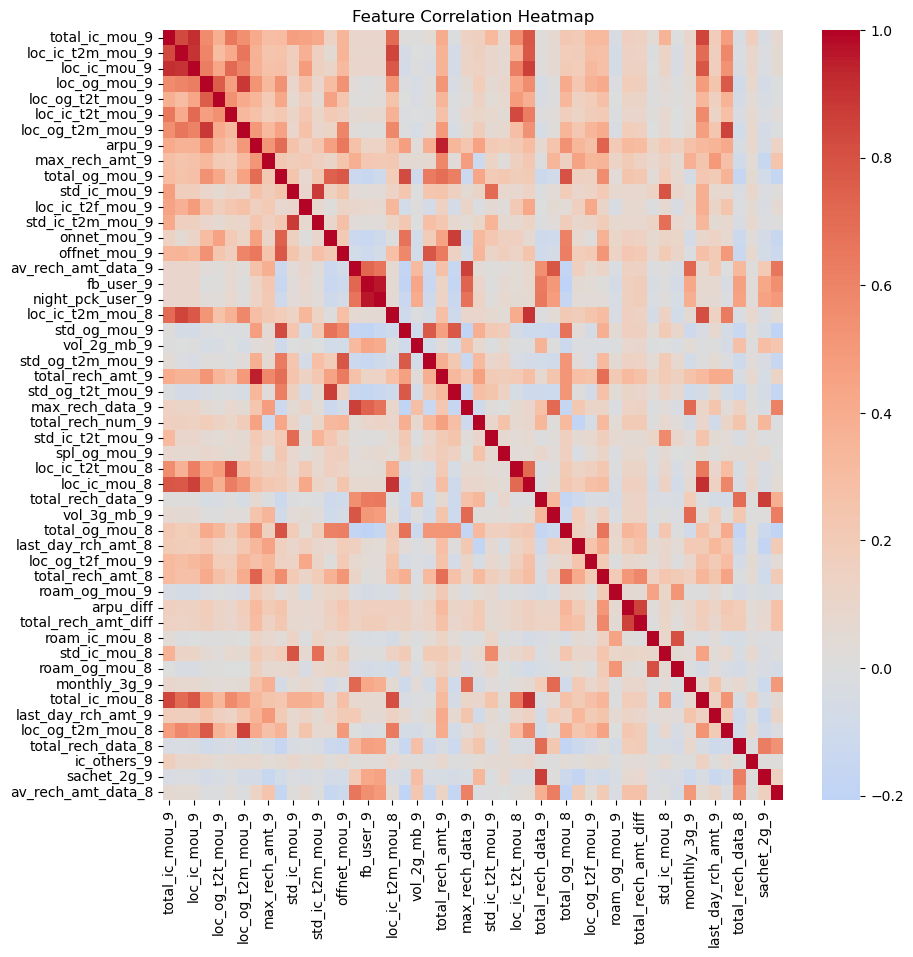

In [142]:
# Plot feature correlation with a different color map
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams["figure.figsize"] = (10, 10)

# Change the color map to 'coolwarm'
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()


#### Insights:
- Highly Correlated Features: Variables like total_ic_mou_9 and loc_ic_t2m_mou_9 display strong positive correlations, indicated by darker red regions.

- Weakly or Negatively Correlated Features: Some features, such as fb_user_9 and others, show weaker or slightly negative correlations, as seen in lighter or blue shades.

- Clusters of Related Features: Groups of variables related to similar metrics (e.g., recharge or usage data) tend to form blocks of high correlation.

- Redundancy: Strongly correlated features might indicate redundancy, suggesting potential candidates for feature reduction.

- Potential Dependencies: This analysis could guide further investigation into causal or dependent relationships within these variables.

In [144]:
# Defining a list of top features to be used in the model
top_features = [
    'total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 
    'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8'
]

# Filtering the training data to include only the top selected features
X_train = X_train[top_features]  # Selecting only the columns from 'top_features' in the training set

# Filtering the test data to include only the top selected features
X_test = X_test[top_features]    # Selecting only the columns from 'top_features' in the test set


In [145]:
# Logistic regression with penalty adjustment
steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(class_weight={0: 0.1, 1: 0.9}, solver='liblinear', max_iter=500))
]

# Compiling the pipeline
logistic = Pipeline(steps)

# Hyperparameters
params = {
    'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
    'logistic__penalty': ['l1', 'l2']  # Both penalties are now compatible with 'liblinear'
}

# 5-fold cross-validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Creating GridSearchCV object with higher verbosity
model = GridSearchCV(
    estimator=logistic,
    cv=folds,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,  # Parallelize across all CPU cores
    verbose=2   # Set verbose to 2 for progress output
)





In [146]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           max_iter=500,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=2)

In [147]:
# Displaying best hyperparameters score
model.best_score_


0.8737275070843914

In [148]:
# Displaying best hyperparameters
model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l1'}

In [149]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5794 1087]
 [ 120  488]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.88


In [150]:
# Getting the logistic regression model from the pipeline's best estimator
logistic_model = model.best_estimator_.named_steps['logistic']

# Extracting the intercept of the logistic regression model and create a DataFrame
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1, 1)), columns=['intercept'])

# Extracting the coefficients, reshape them and convert to a list
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]  # Flatten the list
coefficient = [round(coefficient, 3) for coefficient in coefficient]  # Round coefficients to 3 decimal places

# Getting feature names from the training data and create a DataFrame for the coefficients
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

# Concatenating the intercept and coefficients into one DataFrame
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)

# Displaying the resulting coefficients DataFrame
coefficients


,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.518984,-1.148117,-0.702731,-1.528785,0.236248,-0.019562,0.211795,0.06182,-0.790893,0.94316


#### Key Indicator of churn case study

- From the analysis above, it is evident that the factors influencing customer churn include **total_ic_mou_8** (-1.148) (Total incoming call minutes of usage in the action phase), **total_rech_amt_diff** (-0.703) (Difference in total recharge amount), **total_og_mou_8** (-1.529) (Total outgoing call minutes of usage in the action phase), **arpu_8** (0.236) (Average revenue per user in the action phase), **roam_ic_mou_8** (-0.020) (Roaming incoming call minutes of usage in the action phase), **roam_og_mou_8** (0.212) (Roaming outgoing call minutes of usage in the action phase), **std_ic_mou_8** (0.062) (STD incoming call minutes of usage in the action phase), **std_og_mou_8** (0.943) (STD outgoing call minutes of usage in the action phase), and **av_rech_amt_data_8** (-0.791) (Average recharge amount in the action phase). These values highlight the direction and magnitude of influence for each factor on churn behavior, emphasizing the importance of monitoring usage patterns and recharge trends during the critical action phase.

#### Business Insights

- Identify High-Risk Customers: Monitor usage patterns and recharge behavior to target customers at risk of churn.
- Personalized Engagement: Offer tailored incentives, discounts, and proactive communication to keep customers engaged.
- Enhance Service Quality: Address issues in roaming and outgoing calls to improve the overall customer experience.
 Incentivize Usage: Provide rewards programs and bundled packages to encourage higher engagement.
- Continuous Monitoring & Support: Use predictive models to intervene early, and gather feedback to improve customer satisfaction.
